In [139]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

In [140]:
iris_data = load_iris()

In [141]:
X = iris_data['data']
y = iris_data['target']

target_names = iris_data['target_names']
feature_names = iris_data['feature_names']
iris_data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [143]:
classifier_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier()) #max_leaf_nodes=3
])

In [144]:
classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

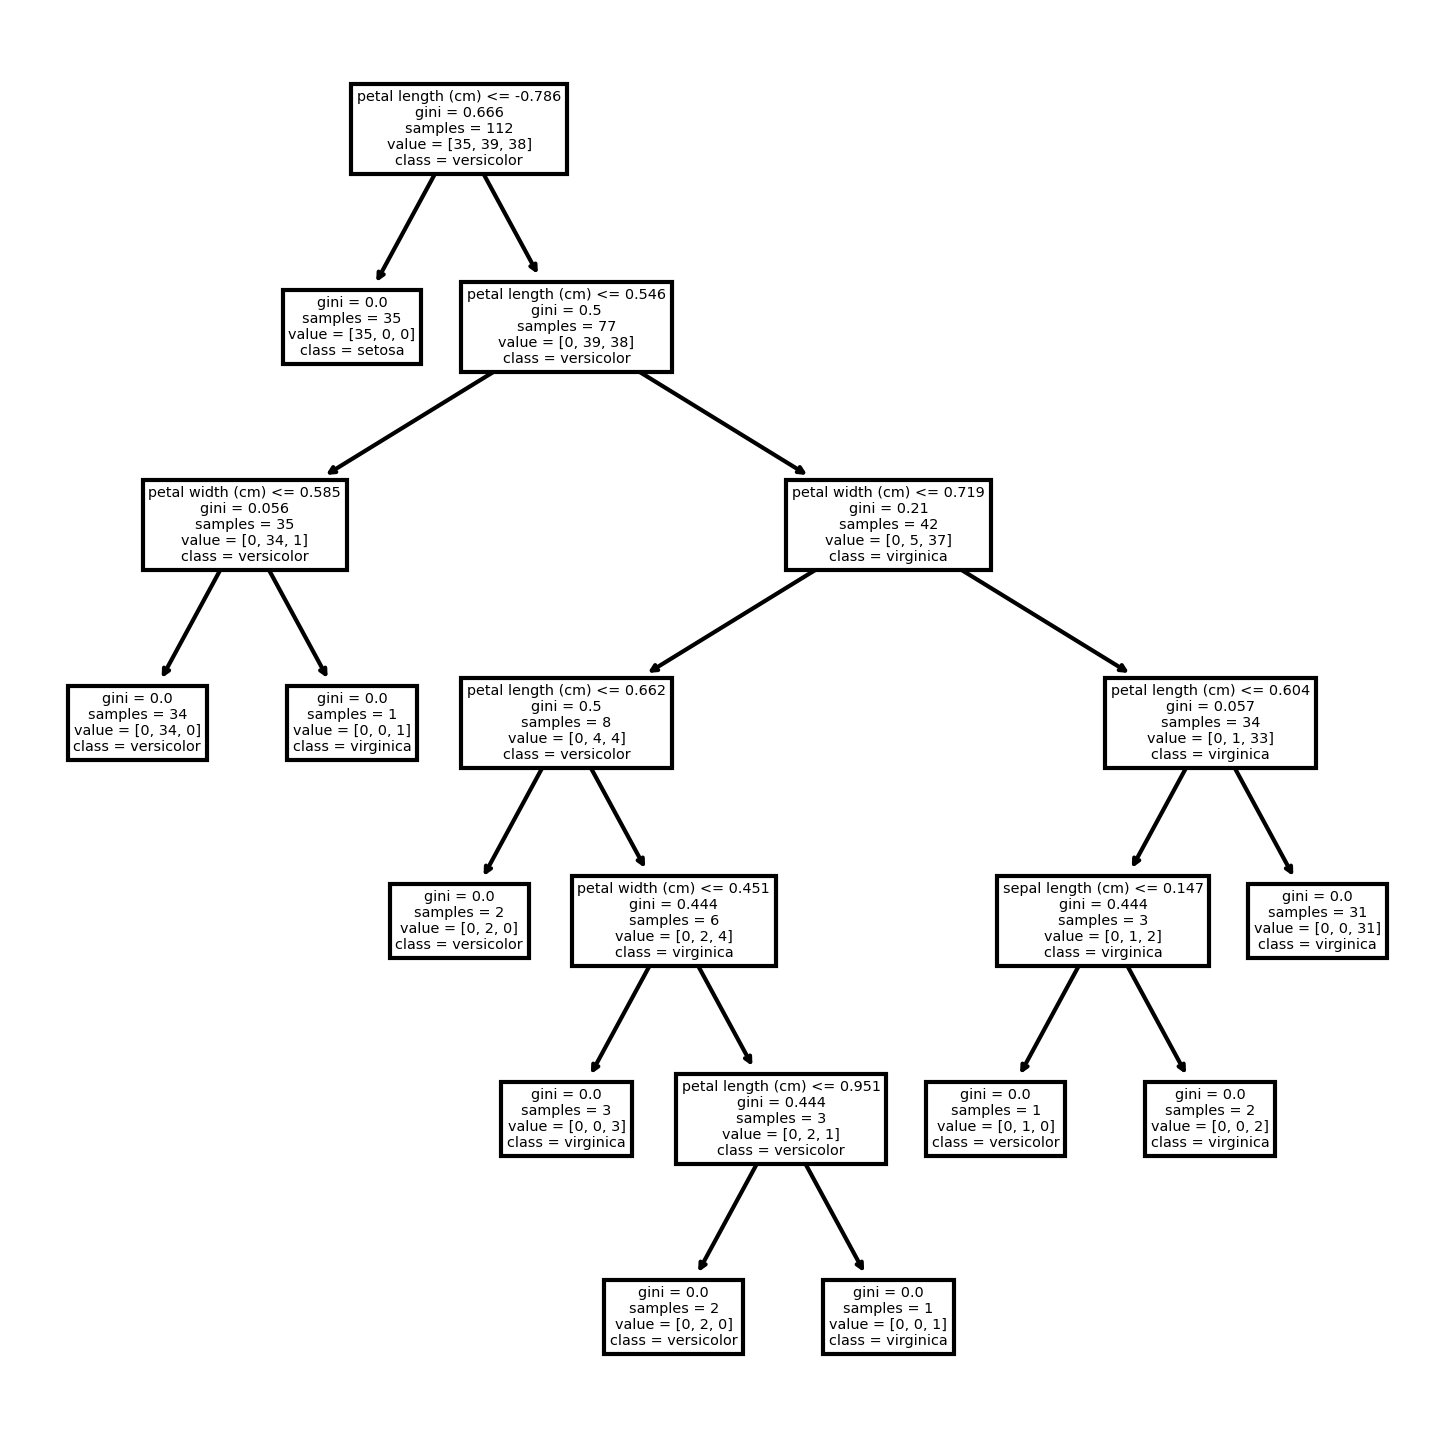

In [145]:
plt.figure(figsize=(6,6),dpi=300)
plot_tree(classifier_pipeline['classifier'], feature_names = feature_names, class_names = target_names)
plt.show()

In [146]:
parameters = parameters = {'classifier__ccp_alpha': np.logspace(-10,2,50)}
score = make_scorer(accuracy_score)

In [147]:
gscv = GridSearchCV(classifier_pipeline, parameters, cv=5, scoring=score, return_train_score=True, refit=True)

In [148]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__ccp_alpha': array([1.00000000e-10, 1.75751062e-10, 3.08884360e-10, 5.42867544e-10,
       9.54095476e-10, 1.67683294e-09, 2.94705170e-09, 5.17947468e-09,
       9.10298178e-09, 1.59985872e-08, 2.81176870e-08, 4.94171336e-08,
       8.68511374e-0...
       7.19685673e-04, 1.26485522e-03, 2.22299648e-03, 3.90693994e-03,
       6.86648845e-03, 1.20679264e-02, 2.12095089e-02, 3.72759372e-02,
       6.55128557e-02, 1.15139540e-01, 2.02358965e-01, 3.55648031e-01,
       6.25055193e-01, 1.09854114e+00, 1.93069773e+00, 3.39322177e+00,
       5.96362332e+00, 1.04811313e+01, 1.84206997e+01, 3.23745754e+01,
       5.68986603e+01, 1.00000000e+02])},
             return_train_score=True, scoring=make_scorer(accuracy_score))

In [149]:
final_classifier_pipeline = gscv.best_estimator_
final_classifier = final_classifier_pipeline['classifier']

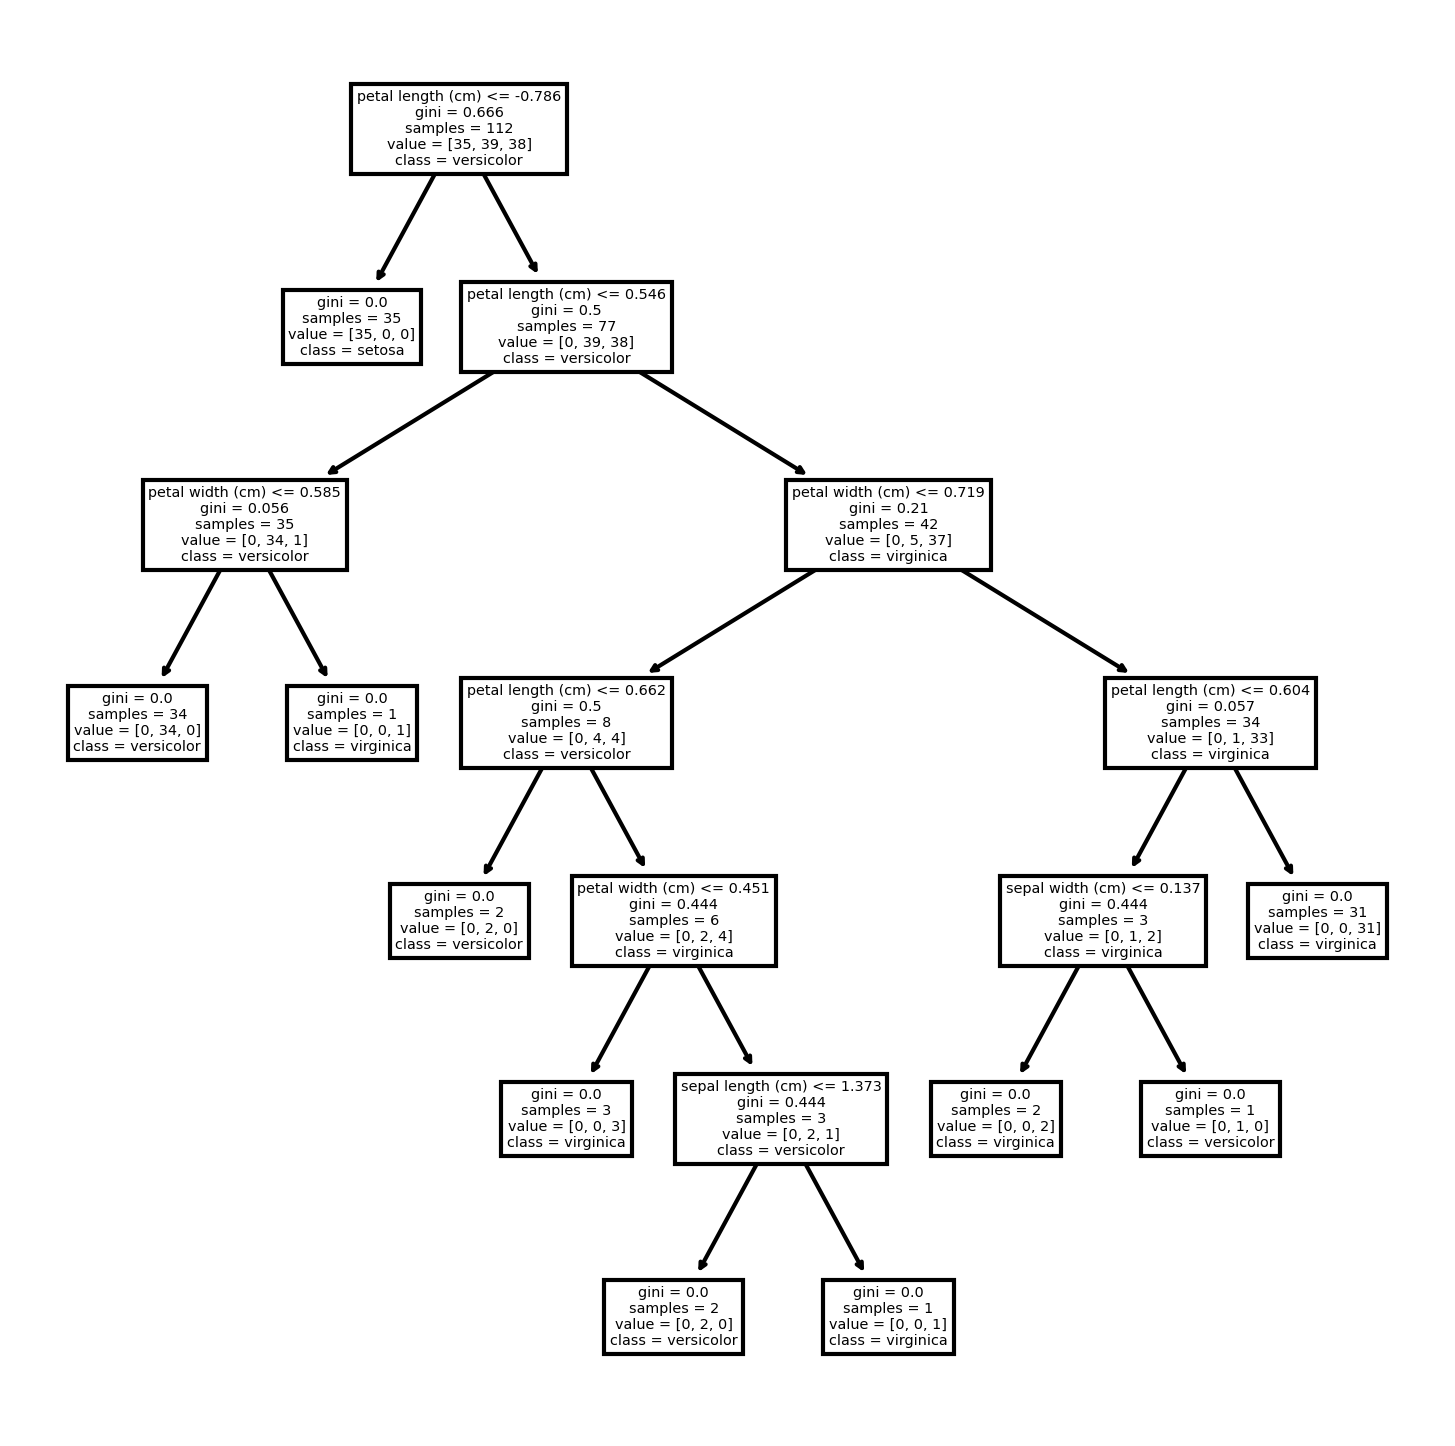

In [150]:
plt.figure(figsize=(6,6),dpi=300)
plot_tree(final_classifier, feature_names = feature_names, class_names = target_names)
plt.show()

In [160]:
final_classifier.tree_.node_count, final_classifier.tree_.n_leaves

(19, 10)

In [151]:
yhat_test = final_classifier_pipeline.predict(X_test)

In [152]:
accuracy_score(y_test, yhat_test)

1.0

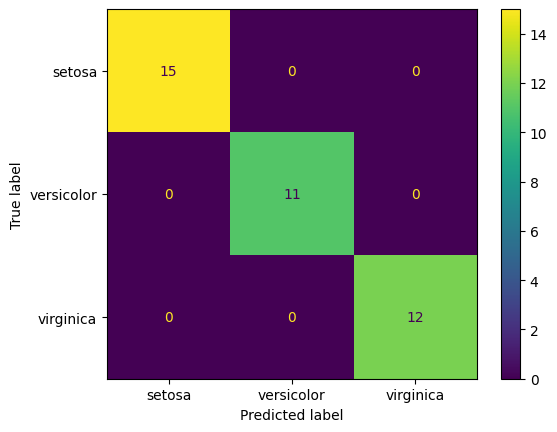

In [153]:
cm = confusion_matrix(y_test, yhat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()